In [76]:
%pip install pandas numpy matplotlib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os, sys, math, random, time

Note: you may need to restart the kernel to use updated packages.


### Provide sensor data recording to run the processing/analysis on

In [77]:
SENSOR_DATA = 'recordings/desk3.csv'

In [78]:
FOLDER = SENSOR_DATA.split('/')[-1].replace('.csv', '')
GRAVITY_FILE = f'analysis/{FOLDER}/gravity.csv'

### Run the sensor processing code

In [79]:
os.system(f'cargo run --release -- {SENSOR_DATA}')

   Compiling lib-mpu6050 v0.1.0 (/home/matt/Projects/2024/gait-analyzer/lib-mpu6050)
 --> /home/matt/Projects/2024/gait-analyzer/lib-mpu6050/src/utils.rs:3:8
  |
3 | pub fn reg_to_f32(high: u8, low: u8) -> f32 {
  |        ^^^^^^^^^^
  |
  = note: `#[warn(dead_code)]` on by default

 --> /home/matt/Projects/2024/gait-analyzer/lib-mpu6050/src/utils.rs:8:8
  |
8 | pub fn raw_i16_to_u16(x: i16) -> u16 {
  |        ^^^^^^^^^^^^^^

  --> /home/matt/Projects/2024/gait-analyzer/lib-mpu6050/src/utils.rs:16:8
   |
16 | pub fn raw_u16_to_i16(x: u16) -> i16 {
   |        ^^^^^^^^^^^^^^

   Compiling test-processing v0.1.0 (/home/matt/Projects/2024/gait-analyzer/test-processing)
    Finished `release` profile [optimized] target(s) in 0.44s
     Running `target/release/test-processing recordings/desk2.csv`


0

### Load sensor data

In [89]:
sensors = pd.read_csv(SENSOR_DATA)
# Convert time to seconds
sensors['time'] = sensors['time'] / 1_000_000 
# Convert ESP32 system time to local time so the graphs make more sense.
now = time.time()
sensors['t'] = pd.to_datetime(sensors['time'] + now, unit='s')
sensors.set_index(sensors['t'], inplace=True)
sensors.drop(columns=['t'], inplace=True)
sensors

,time,gyro.x,gyro.y,gyro.z,accel.x,accel.y,accel.z,packet.gyro.x,packet.gyro.y,packet.gyro.z,packet.accel.x,packet.accel.y,packet.accel.z,packet.quaternion.w,packet.quaternion.x,packet.quaternion.y,packet.quaternion.z
t,,,,,,,,,,,,,,,,,
2024-11-08 12:53:18.216092587,133.646110,-0.426829,0.121951,0.121951,-0.002075,0.001465,1.001709,-0.000208,0.000000,0.000030,-6.332994e-08,4.470348e-08,0.000031,65535.035,353.00214,39.866577,120837.445
2024-11-08 12:53:18.226474524,133.656492,-1.341463,0.365854,0.548781,-0.000244,0.001587,0.999512,-0.000655,0.000119,0.000238,-7.450581e-09,4.842877e-08,0.000031,65535.080,344.72144,41.746400,-60407.746
2024-11-08 12:53:18.237077475,133.667095,-1.463415,0.365854,0.487805,0.001831,0.002075,0.998779,-0.000715,0.000119,0.000208,5.587935e-08,6.332994e-08,0.000030,65535.130,335.17150,43.376343,22539.234
2024-11-08 12:53:18.247504473,133.677522,-1.463415,0.365854,0.548781,0.000732,0.000732,0.999756,-0.000715,0.000119,0.000238,2.235174e-08,2.235174e-08,0.000031,65535.170,325.87683,45.098938,87054.220
2024-11-08 12:53:18.258004426,133.688022,-1.402439,0.365854,0.548781,0.000977,0.002319,0.994873,-0.000685,0.000119,0.000238,2.980232e-08,7.078052e-08,0.000030,65535.215,316.83105,46.754395,73745.200
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-11-08 12:53:32.765893459,148.195911,-1.463415,0.365854,0.609756,-0.011597,-0.056763,1.006226,-0.000715,0.000119,0.000268,-3.539026e-07,-1.732260e-06,0.000031,65464.426,-2526.64000,270.608280,-17747.408
2024-11-08 12:53:32.776526451,148.206544,-1.402439,0.304878,0.609756,-0.009033,-0.057251,1.008301,-0.000685,0.000089,0.000268,-2.756715e-07,-1.747161e-06,0.000031,65464.094,-2532.62550,272.429750,-129359.940
2024-11-08 12:53:32.786945581,148.216963,-1.402439,0.609756,0.548781,-0.007202,-0.056885,1.005371,-0.000685,0.000238,0.000238,-2.197921e-07,-1.735985e-06,0.000031,65463.790,-2538.13100,275.033630,40627.125


### Preview DMP corrected sensor data

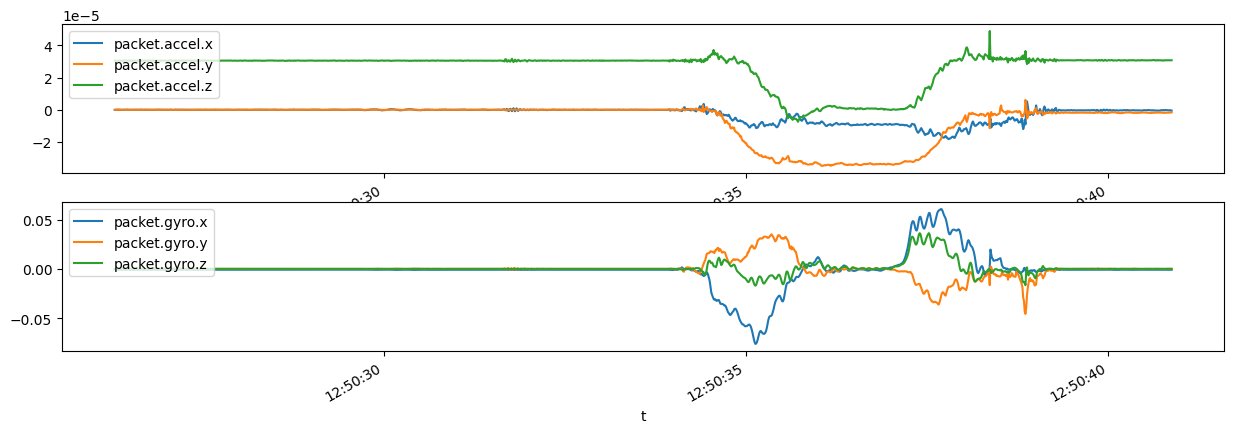

In [81]:
fig, (ax1, ax2) = plt.subplots(2, 1)

sensors['packet.accel.x'].plot(ax=ax1)
sensors['packet.accel.y'].plot(ax=ax1)
sensors['packet.accel.z'].plot(ax=ax1)
ax1.legend(loc='upper left')

sensors['packet.gyro.x'].plot(ax=ax2)
sensors['packet.gyro.y'].plot(ax=ax2)
sensors['packet.gyro.z'].plot(ax=ax2)
ax2.legend(loc='upper left')

fig.set_figwidth(15)

### Preview DMP computed gravity vector

In [82]:
gravity = pd.read_csv(GRAVITY_FILE)
gravity['time'] = gravity['time'] / 1_000_000 
gravity['t'] = pd.to_datetime(gravity['time'] + now, unit='s')
gravity.set_index(gravity['t'], inplace=True)
gravity.drop(columns=['t'], inplace=True)

In [86]:
gravity['length'] = np.sqrt(
    np.pow(gravity['x'], 2) + 
    np.pow(gravity['y'], 2) + 
    np.pow(gravity['z'], 2)
)
gravity['x_corr'] = gravity['x'] / gravity['length']
gravity['y_corr'] = gravity['y'] / gravity['length']
gravity['z_corr'] = gravity['y'] / gravity['length']

/home/matt/Projects/2024/gait-analyzer/test-processing/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [87]:
gravity

,time,x,y,z,length,x_corr,y_corr,z_corr
t,,,,,,,,
2024-11-08 12:50:26.285595179,133.646110,80086440.0,55902770.0,18896280000,2.567255e+09,0.031195,0.021775,0.021775
2024-11-08 12:50:26.295985222,133.656500,-47119396.0,40139080.0,7943704600,2.786762e+09,-0.016908,0.014403,0.014403
2024-11-08 12:50:26.306581020,133.667096,9423670.0,45886356.0,4802645500,2.149617e+09,0.004384,0.021346,0.021346
2024-11-08 12:50:26.317005157,133.677520,50826772.0,50564892.0,11873083000,NaN,NaN,NaN,NaN
2024-11-08 12:50:26.327509165,133.688024,40601420.0,48423010.0,9733019000,1.581750e+09,0.025669,0.030614,0.030614
...,...,...,...,...,...,...,...,...
2024-11-08 12:50:40.835385084,148.195900,54252184.0,-340415230.0,4587794000,1.649223e+09,0.032896,-0.206409,-0.206409
2024-11-08 12:50:40.846025229,148.206540,619571840.0,-402075070.0,21006713000,NaN,NaN,NaN,NaN
2024-11-08 12:50:40.856445074,148.216960,-242243420.0,-309963700.0,5923186700,NaN,NaN,NaN,NaN


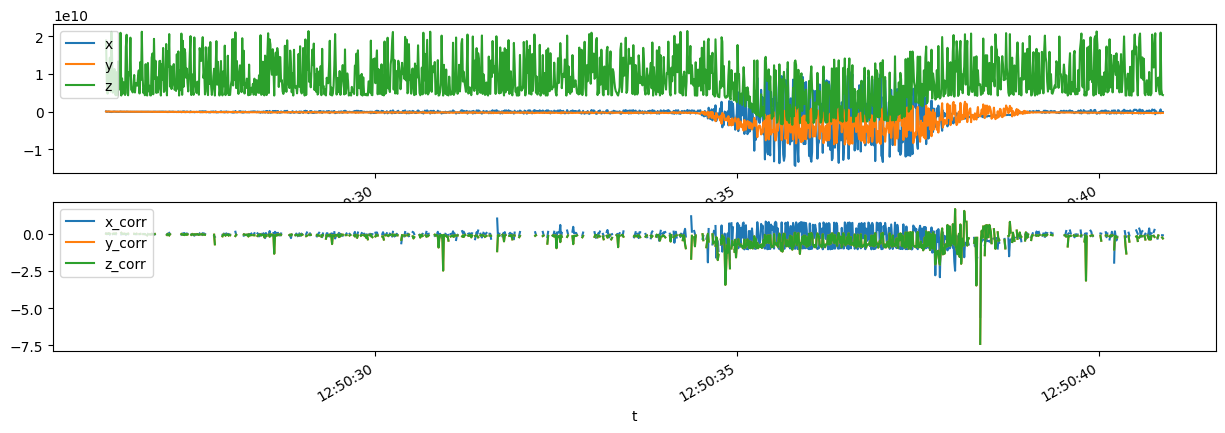

In [88]:
fig, (ax1, ax2) = plt.subplots(2, 1)

gravity['x'].plot(ax=ax1)
gravity['y'].plot(ax=ax1)
gravity['z'].plot(ax=ax1)
ax1.legend(loc='upper left')

gravity['x_corr'].plot(ax=ax2)
gravity['y_corr'].plot(ax=ax2)
gravity['z_corr'].plot(ax=ax2)
ax2.legend(loc='upper left')

fig.set_figwidth(15)